In [1]:
%matplotlib inline
import pylhe
import matplotlib.pyplot as plt
import numpy as np

# LHE File for "p p > h, h > a a"
h2aa_file = pylhe.readLHE('Events/run_pphaa/unweighted_events.lhe')

# LHE File for "p p > h, h > S S"
h2SS_file = pylhe.readLHE('Events/run_pphSS/unweighted_events.lhe')

# LHE File for "p p > H  j, H > S S HIGHMS"
lhe_hjss_highMS = pylhe.readLHE("Events/run_pphjSS_highMS/unweighted_events.lhe")

# LHE File for "p p > H  j, H > S S LOWMS"
lhe_hjss_lowMS = pylhe.readLHE("Events/run_pphjSS_lowMS/unweighted_events.lhe")

# LHE File for "p p > H  j, H > S S LOWLHS"
lhe_hjss_lowLHS = pylhe.readLHE("Events/run_ppHjSS_lowLHS/unweighted_events.lhe")

# LHE File for "p p > H  j, H > S S HIGHWH"
lhe_hjss_highWH = pylhe.readLHE("Events/run_pphjss_highWH/unweighted_events.lhe")

def momenta(particles):
    total_momentum = 0
    p = [0, 0, 0]
    for ptc in particles:
        p[0] += ptc.px
        p[1] += ptc.py
        p[2] += ptc.pz
    total_momentum = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
    return total_momentum

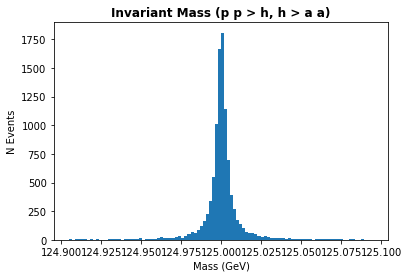

In [2]:
# Finding photons invariant mass 
aa_invariant_mass = []
for event in h2aa_file:
    photons = []
    e_photons = []
    for ptc in event.particles:
        if ptc.id == 22:
            photons.append(ptc)
            e_photons.append(ptc.e)
    aa_invariant_mass.append(np.sqrt(sum(e_photons)**2 - momenta(photons)**2))


# histogram for "p  p > H > a a"
plt.hist(aa_invariant_mass, bins = 100)
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > a a)', fontweight="bold")

plt.show()

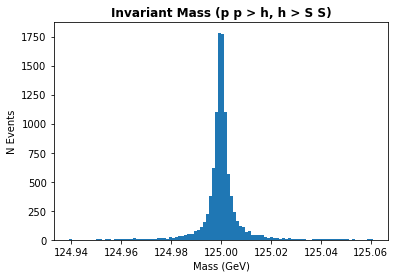

In [4]:
# Finding dark matter invariant mass 
ss_invariant_mass = []
for event in h2SS_file:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    ss_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))


# histogram for "p  p > H > S S"
plt.hist(ss_invariant_mass, bins = 100)
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > S S)', fontweight="bold")

plt.show()

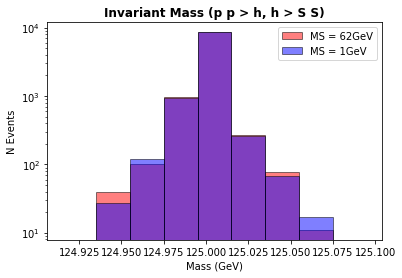

In [2]:
# Finding dark matter invariant mass 
highMS_invariant_mass = []
for event in lhe_hjss_highMS:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    highMS_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))

lowMS_invariant_mass = []
for event in lhe_hjss_lowMS:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    lowMS_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))

bins = np.arange(124.915, 125.10, 0.02)
# histogram for "p  p > H > S S" HIGHMS
plt.hist(highMS_invariant_mass, bins = bins, alpha=0.5, color='red', label='MS = 62GeV', log=True, edgecolor='black')
# histogram for "p  p > H > S S" LOWMS
plt.hist(lowMS_invariant_mass, bins = bins, alpha=0.5, color='blue', label='MS = 1GeV', log=True, edgecolor='black')
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > S S)', fontweight="bold")
plt.legend()
plt.show()

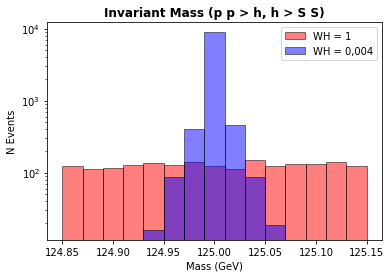

In [2]:
highWH_invariant_mass = []
for event in lhe_hjss_highWH:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    highWH_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))

ss_invariant_mass = []
for event in h2SS_file:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    ss_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))

bins = np.arange(124.85, 125.15, 0.02)
# histogram for "p  p > H > S S" HIGHWH
plt.hist(highWH_invariant_mass, bins = bins, alpha=0.5, color='red', label='WH = 1', edgecolor='black', log=True)
# histogram for "p  p > H > S S" NORMALWH
plt.hist(ss_invariant_mass, bins = bins, alpha=0.5, color='blue', label='WH = 0,004', edgecolor='black', log=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > S S)', fontweight="bold")
plt.legend()
plt.show()